In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Introduction 
Probability and statistics are two sides of the same coin. Probability theory gives us tools to model the world and predict the outcomes of random systems; statistics explains our observations of the world and evaluates the accuracy of our models. Oceanographers use tools from probability in fields as diverse as genomics and eddy modeling, while every experimentalist employs statistical methods in the analysis section of their papers. Probability and statistics are too broad to cover in any depth in a single 90-minute lecture, even as a review. But the basic principles of both subjects follow from a common goal: reasoning about information.

## Learning Goals

The learning goals for this lecture are to become familiar with some of the basic tools and ideas of probability theory and statistics: independence, Bayes' theorem, expectation, hypothesis testing, confidence intervals, and regressions. In addition, we will review some common statistical descriptors and probability distributions.

# Probability Theory
> "Probability theory is the branch of mathematics that deals with probability" -*en.wikipedia.org*

Probability is the system by which we model random, or stochastic, phenomena- systems with a degree of uncertainty. We model such a system abstractly with a *probability space*: a set of possible outcomes for the system, each with a value (its probability) that denotes its likelihood of occurring. For this to truly be a probability space, we require that all probabilities sum to one (or integrate to one, in the case of continuous spaces):
$$\sum_ip_i = 1 \qquad \int_xp(x)dx = 1$$
## Random Variables
> "You’ve gotta ask yourself a question: “Do I feel lucky?” Well, do ya, punk?" -Harry Calahan, *Dirty Harry*

Mathematically, a *random variable* associates a value with each outcome in a probability space. Random variables can be used to represent a wide range of systems. For example, imagine you are playing a game of roulette.

<img src='https://www.888casino.com/blog/sites/newblog.888casino.com/files/inline-images/american-roulette-wheel_0.jpg' height=300 width=300/>

The wheel has 18 black numbers, 18 red numbers, and 2 green numbers. We can model our earnings after betting \\$1000 on black with a random variable $X$. $X$ will be $2000 if the number is black, and zero otherwise. 

How much can we expect to win, if we make this same bet a large number of times? The *expectation* of a random variable lets us answer this and many similar questions:

$$\mathbb{E}\left[X\right] = \sum_xxP(X=x)$$
That is, the expectation is the weighted sum of all the values the random variable can take on, where the weight is the probability. For the roulette wheel,

$$\mathbb{E}\left[X\right] =  2000\cdot\frac{16}{38}+0 \cdot \frac{18}{38} \approx \$842.11$$

Apparently, we shouldn't play roulette!

One last note: when we *realize* a random variable, or observe its value, we call that *sampling*.

## Independence
> "We're going to live on! We're going to survive! Today we celebrate our Independence Day!" -President Whitmore, *Independence Day*

Earlier, I mentioned that this subject deals with reasoning about information. Independence of random variables is best understood as a statement about mutual information:

*If two random variables $X$ and $Y$ are independent, then learning something about the outcome of $Y$ doesn't give us any information about the outcome of $X$*

We can write this formally using conditional probability notation. For outcomes $X = x$ and $Y = y$, the *conditional probability* $P(X=x | Y=y)$ denotes the probability of $X=x$ occurring, given that $Y=y$ has occured. For brevity, we'll write this as $P(X|Y)$, dropping the values when there's no ambiguity. So for independent random variables, $P(X|Y) = P(X)$ for every possible outcome. 

We can see how this works by first simulating a simple six-sided die roll and a coin flip. We'll let $D$ be a random variable representing the roll of the die, and $C$ the coin flip (where heads is 1 and tails is 0). Our probability space here has as its outcomes all the pairs $\{(0, 0), (1, 0), \dots, (6, 0), (0, 1), \dots, (6, 1)\}$.

In [2]:
# This function simulates rolling a die and flipping a coin
def simulate_independent_random_variables():
    
    # Roll the die and store the result in D
    D = np.random.randint(1, 6+1)
    
    # Flip the coin and store the result in C
    C = np.random.randint(0, 1+1)
    
    # Return the pair (D, C)
    return (D, C)

# We will run 10,000 trials of this random system
N = 10000

simulations = [simulate_independent_random_variables() for n in range(N)]

# To evaluate the independence of the two random variables, we'll take a look at
# the fraction of the total set for each outcome 
for c in range(0, 1+1): # Python range is a weird function
    for d in range(1, 6+1):
        num_outcomes = len([x for x in simulations if x == (d, c)])
        num_coin = len([x for x in simulations if x[1] == c])
        print(f"Outcome ({d}, {c}): {num_outcomes} / {num_coin} ~ {num_outcomes/num_coin:3.5f}")
print(f"Theoretical:    {1}   /    {6} ~ {1/6:3.5f}")

Outcome (1, 0): 810 / 5096 ~ 0.15895
Outcome (2, 0): 866 / 5096 ~ 0.16994
Outcome (3, 0): 865 / 5096 ~ 0.16974
Outcome (4, 0): 854 / 5096 ~ 0.16758
Outcome (5, 0): 862 / 5096 ~ 0.16915
Outcome (6, 0): 839 / 5096 ~ 0.16464
Outcome (1, 1): 858 / 4904 ~ 0.17496
Outcome (2, 1): 777 / 4904 ~ 0.15844
Outcome (3, 1): 834 / 4904 ~ 0.17007
Outcome (4, 1): 815 / 4904 ~ 0.16619
Outcome (5, 1): 794 / 4904 ~ 0.16191
Outcome (6, 1): 826 / 4904 ~ 0.16843
Theoretical:    1   /    6 ~ 0.16667


What about random variables that aren't independent? We can use two coin flips to help us demonstrate. Specifically, let $X$ be the random variable that takes on the sum of the two coin flips, and let $Y$ be the product.

In [3]:
# This function simulates flipping two coins
def simulate_nonindependent_random_variables():
    
    # Flip the first coin and store the result in D1
    C1 = np.random.randint(0, 1+1)
    
    # Flip the second coin and store the result in D2
    C2 = np.random.randint(0, 1+1)
    
    # Return the pair (C1+C2, C1*C2)
    return (C1+C2, C1*C2)

# We will run 10,000 trials of this random system
N = 10000

simulations = [simulate_nonindependent_random_variables() for n in range(N)]

# To evaluate the nonindependence of the two random variables, we'll take a look at
# the fraction of the total set for each outcome 
for y in range(0, 1+1): # Python range is a weird function
    for x in range(0, 2+1):
        num_outcomes = len([z for z in simulations if z == (x, y)])
        num_y = len([z for z in simulations if z[1] == y])
        print(f"Outcome ({x}, {y}): {num_outcomes} / {num_y} ~ {num_outcomes/num_y:3.5f}")
#print(f"Theoretical:    {1}   /    {6} ~ {1/6:3.5f}")

Outcome (0, 0): 2557 / 7502 ~ 0.34084
Outcome (1, 0): 4945 / 7502 ~ 0.65916
Outcome (2, 0): 0 / 7502 ~ 0.00000
Outcome (0, 1): 0 / 2498 ~ 0.00000
Outcome (1, 1): 0 / 2498 ~ 0.00000
Outcome (2, 1): 2498 / 2498 ~ 1.00000


In theory, the probability that two coinflips sum to one is $1/2$, so clearly these events are nonindependent.

## Bayes Theorem

> “Now, remember what Bayes' Theorem does: it helps us update a hypothesis based on new evidence.” - Dan Morris, *Bayes Theorem: A Visual Introduction For Beginners*

Bayes Theorem gives us a way to relate conditional probabilities of events:

$$P(A|B) = \frac{P(A \text{ and } B)}{P(B)}$$

By rearranging the above expression, we can get an equivalent expression:
$$P(A \text{ and } B) = P(A|B)P(B)$$
We chose the names for these events arbitrarily; therefore, we can swap them, and substitute into the original expression:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
Finally, we can rewrite the denominator as a sum of two conditional probabilities (as $P(B) = P(B \text{ and } A) + P(B \text{ and not }A) = P(B \text{ and } A) + P(B \text{ and } A^C) = P(B|A)P(A)+P(B|A^C)P(A^C)$:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|A^C)P(A^C)}$$

This is an extremely powerful equation for reasoning about information, as the following example will demonstrate.

Rapid point-of-care HIV testing allows for quick, cheap screening of a large number of people for HIV. When compared with viral load testing, the rapid tests have a $93.7\%$ true positive rate and a $98.1\%$ true negative rate. That is,
$$P(Test +| HIV +) = .937$$
$$P(Test -| HIV +) = .063$$
$$P(Test +| HIV -) = .019$$
$$P(Test -| HIV -) = .981$$
There are approximately $1.1$ million people in the US living with HIV, out of about $327.2$ million people. What is the probability that a person who tests positive for HIV, has HIV- what is $P(HIV +|Test +)$? 

$$P(H+|T+) = \frac{P(T+|H+)P(H+)}{P(T+|H+)P(H+)+P(T+|H-)P(H-)}$$

$$P(H+|T+) = \frac{.937 \cdot 1.1 / 327.5}{.937 \cdot 1.1 / 327.5+.019 \cdot 326.4 / 327.5} \approx 0.1425$$

In [4]:
def simulate_test():
    status = np.random.choice(['h+', 'h-'], p = (1.1/327.2, 1 - 1.1/327.2))
    if status == 'h+':
        test = np.random.choice(['t+', 't-'], p = (.937, 1 - .937))
    else:
        test = np.random.choice(['t+', 't-'], p = (1 - .981, .981))
    return (status, test)

N = 50000

simulations = [simulate_test() for x in range(N)]

conditioned_simulations = [x[0] for x in simulations if x[1] == 't+']

probability = len([x for x in conditioned_simulations if x == 'h+']) / len(conditioned_simulations)
print(f"P(H+ | T+) = {probability:3.5f}")

P(H+ | T+) = 0.14775


Bayes theorem tells us that even with the high accuracy of the test, the low likelihood of a person actually having HIV means that most positive test results are in fact false positives. 

## Linearity of Expecation
> "I find my life is a lot easier the lower I keep my expectations." -Bill Watterson, *Calvin and Hobbes*

What is *expectation*? It's a generalization of the average (mean) of a set of numbers. What is the average of 3, 5, and 7? We can calculate this by dividing the sum of these numbers by three:
$$\text{Ave}\left(3, 5, 7\right) = \frac{3 + 5 + 7}{3} = 5$$
To extend this to expectation, first we can rewrite the fraction to give each number its own weight, $1/3$:
$$\text{Ave}\left(3, 5, 7\right) = \frac{1}{3}3 + \frac{1}{3}5 + \frac{1}{3}7$$
If we let $X$ be a random variable with a uniform distribution on $\{3, 5, 7\}$, then we can rewrite this average as:
$$\frac{1}{3}3 + \frac{1}{3}5 + \frac{1}{3}7 = \sum_xP(X = x) \cdot x$$

So this average of three numbers is a weighted sum of the values taken on by the random variable $X$; each weight is the value of that number. This expression- $\sum_xP(x)\cdot x$- is known as the *expectation* of the random variable $X$. 

$$\mathbb{E}\left[X\right] = \sum_xxP(X = x)$$
And with it written in this form, we can easily extend the idea of averaging to non-uniformly distributed random variables (even infinite ones!)

Let $Y$ be a random variable with a geometric distribution on the natural numbers $\{0, 1, 2, \dots\}$:
$$P(Y = k) = p(1-p)^k$$
This distribution models, for example, the number of flips of a weighted coin before the first heads. What is the expectation of $Y$?

$$\mathbb{E}\left[Y\right] = \sum_kkP(Y = k) = \sum_{k=0}^{\infty}kp(1-p)^k = p(1-p)\sum_{k=0}^{\infty}k(1-p)^{k-1} = -p(1-p)\frac{d}{dp}\sum_{k=0}^{\infty}(1-p)^k$$
$$\mathbb{E}\left[Y\right] = -p(1-p)\frac{d}{dp}\left[\frac{1}{1-(1-p)}\right] = \frac{1-p}{p}$$

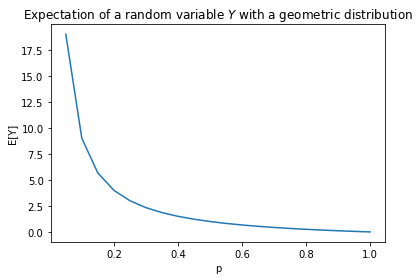

In [5]:
delta_x = 0.05
x = np.array([delta_x * (x + 1) for x in range(int(1 / delta_x))])
y = (1 - x) / x

plt.plot(x, y)
plt.title("Expectation of a random variable $Y$ with a geometric distribution")
plt.xlabel("p")
plt.ylabel("E[Y]")
plt.show()

Expectation has an extremely useful property- *linearity* . 

$$\text{Linearity of Expectation: For any scalars } a \text{ and } b\text{, and random variables } X \text{ and } Y \text{, } \mathbb{E}\left[aX + bY\right] = a\mathbb{E}\left[X\right] + b\mathbb{E}\left[Y\right]$$

Why is this a useful property? For one, linearity allows us to "pass the expectation through" an expression:

$$\mathbb{E}\left[\sum_{k=1}^{n}a_kX^k\right] = \sum_ka_k\mathbb{E}\left[X^k\right]$$

This gives us the ability to break down complicated functions of random variables into pieces than are much easier to calculate. The canonical expression for the variance of a random variable is derived using linearity of expectation:

$$\mathbb{E}\left[(X-\mu)^2\right] = \mathbb{E}\left[X^2-2\mu X + \mu^2\right] = \mathbb{E}\left[X^2\right]-2\mu\mathbb{E}\left[X\right]+\mu^2 = \mathbb{E}\left[X^2\right] -\mu^2$$
where $\mu = \mathbb{E}\left[X\right]$.

In the case of continuous random variables, we alter the expression for expectation somewhat:
$$\mathbb{E}\left[X\right] = \int_xxP(X=x)dx$$

You can think of $P(X=x)dx$ as the probability of $X$ taking on a value between $x$ and $x + dx$- a kind of weighted Reimann sum.

## How to Describe a Distribution
> "I just wish that Statistics was as easy as arranging numbers in chronological order, finding the median, lower and upper quartiles, and placing them on a Box and whisker's chart" -Charmaine J. Forde

We've seen that random variables have probability distributions associated with them. We can, of course, describe a finite, discrete probability distribution (which is a function) by listing all the input-output pairs. But this doesn't give us much useful information for understanding what might happen if we sample from it; and we can't list all the pairs for an infinite distribution.

Instead, probabilists and statisticians have developed a wide range of quantitative descriptors for the behavior of a probability distribution. Some of the more common ones are:

$$\begin{align*}
\text{Mean:} &\qquad \mu(X) = \mathbb{E}\left[X\right]\\
\text{Variance:} &\qquad \sigma^2(X) = \mathbb{E}\left[(X-\mu(X))^2\right] \\
\text{Standard Deviation:} &\qquad \sigma(X) = \sqrt{\mathbb{E}\left[(X-\mu(X))^2\right]} \\
\text{Median:} &\qquad P(x \leq \text{Median}(X)) = 0.5 \\
\text{Mode:} &\qquad \arg\max_xP(X=x) \\
\text{Support:} &\qquad \{x | P(X = x) > 0\} \\
\text{Range:} &\qquad \max(\text{Support}(X)) - \min(\text{Support}(X)) \\
\text{Quartiles: } &\qquad P(x \leq Q_1) = 0.25; P(X \leq Q_3) = 0.75 \\
\text{Interquartile Range:} &\qquad Q_3 - Q_1 \\
\text{Skewness:} &\qquad \mathbb{E}\left[\left(\frac{X - \mu(X)}{\sigma(X)}\right)^3\right] \\
\text{Kurtosis:} &\qquad \mathbb{E}\left[\left(\frac{X - \mu(X)}{\sigma(X)}\right)^4\right]
\end{align*}$$

You may have heard of some of these before; others (like kurtosis) are rare enough that you may never encounter them. I want to focus on three groups of these descripters for a moment:

<table style="width:100%">
  <tr>
    <th>Type</th>
    <th>Center</th>
    <th>Spread</th> 
  </tr>
  <tr>
    <td>Expectation</td>
    <td>Mean</td>
    <td>Variance</td> 
  </tr>
  <tr>
    <td>Robust</td>
    <td>Median</td>
    <td>IQR</td> 
  </tr>
  <tr>
    <td>Extreme</td>
    <td>Mode</td>
    <td>Range</td> 
  </tr>
</table>

Each of these descriptors represents either the central value or the spread of a distribution. But the properties of these descriptors are often quite different. 

The two "Expectation" descriptors, the mean and the variance, are derived from the expectation of (functions of) the random variable. They both fall into an entire class of mathematical descriptors known as moments (skewness and kurtosis are also types of moments). Moments of a distribution have many nice analytical properties, and expressions involving moments arise frequently in physics and engineering. The mean and variance are, however, not always defined for a distribution; in addition, moments are not particularly resistant to outliers. That means that extreme values of a distribution can have an influence on moments out of proportion to their probabilites.

Consider a random variable $X$ that takes on the value $0$ with probability $0.5 * (1 - 10^{-5})$, the value $1$ with the same probability, and the value $10^{10}$ with probability $10^{-5}$. What are the mean and variance of $X$?

$$\mathbb{E}\left[X\right] = 0.5 * (1 - 10^{-5}) + 10^{10} * 10^{-5} \approx 10^{5}$$
$$\mathbb{E}\left[X^2\right]-\mu^2 \approx 0.5 * (1 - 10^{-5}) + 10^{20} * 10^{-5} - 10^{10}\approx 10^{15}$$

The two "Robust" descriptors address this problem, sacrificing the analytical properties of the descriptors for resistance to outliers. You could, for example, multiply the larget value in the support of a random variable by $10^{100}$, and the median and IQR would remain unchanged. These types of descriptors are most useful when discussing samples; a box-and-whiskers plot, for example, will show the median and IQR of a dataset as the lines on the large central box:
<img src='https://upload.wikimedia.org/wikipedia/commons/2/2f/BoxPlot.jpg' height=300 width=800/>
Finally, the two "Extreme" descriptors represent extremes of the random variable. The *mode* is the value with the highest likelihood of being sampled, while the *range* is the difference between the largest and smallest possible values to sample. Modes often arise in discussions of maximum likelihood; range gives you guarantees about where your samples will lie. 

Some probability distributions are so common, they have names. Here are a couple important ones:

### Binomial Distribution

The binomial distribution represents the number of heads you get after flipping $n$ coins, where each coin has a probability of $p$ of getting heads.

$$P(k; n, p) = \binom{n}{k}p^K(1-p)^{n-k}$$
$$\begin{align*}
\text{Mean:} &\qquad np\\
\text{Variance:} &\qquad np(1-p) \\
\text{Median:} &\qquad \lfloor np \rfloor \text{ or } \lceil np \rceil \\
\text{Support:} &\qquad \{0, 1, \dots, n\}
\end{align*}$$

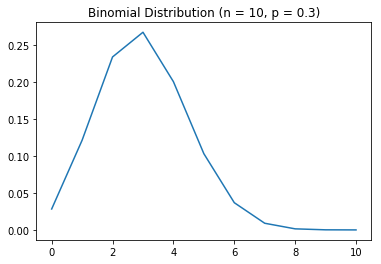

In [6]:
def binomial(k, n, p): # n and p are parameters
    return (np.math.factorial(n)/(np.math.factorial(k) * np.math.factorial(n - k))) * p**k * (1-p)**(n-k)

# CHANGE THESE TO SEE DIFFERENT BINOMIAL DISTRIBUTIONS
n = 10
p = 0.3

x = [i for i in range(n+1)]
y = [binomial(i, n, p) for i in x]
plt.plot(x, y)
plt.title(f"Binomial Distribution (n = {n}, p = {p})")
plt.show()

### Poisson Distribution

The Poisson distribution represents the expected number of events occuring in a fixed interval of time, when the rate at which events happen is $\lambda$, and each event is independent of any others

$$P(k; \lambda) = e^{\lambda}\frac{\lambda^k}{k!}$$

$$\begin{align*}
\text{Mean:} &\qquad \lambda\\
\text{Variance:} &\qquad  \lambda\\
\text{Median:} &\qquad \lfloor \lambda + 1/3 - 0.02\lambda \rfloor\\
\text{Support:} &\qquad \{0, 1, 2, \dots\}
\end{align*}$$

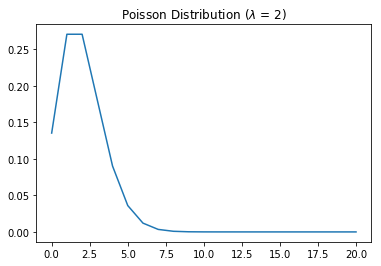

In [7]:
def poisson(k, mean): # mean is a parameter
    return np.exp(-mean) * mean**k / np.math.factorial(k)

# CHANGE THIS TO SEE DIFFERENT POISSON DISTRIBUTIONS
mean = 2
x = [i for i in range(20+1)]
y = [poisson(i, mean) for i in x]
plt.plot(x, y)
plt.title(f"Poisson Distribution ($\lambda$ = {mean})")
plt.show()

### Geometric Distribution

The geometric distribution represents the number of coin flips required before flipping your first heads, when the coins have a probability $p$ of coming up heads.

$$P(k; p) = p(1-p)^k$$

$$\begin{align*}
\text{Mean:} &\qquad \frac{1-p}{p}\\
\text{Variance:} &\qquad  \frac{1-p}{p^2}\\
\text{Median:} &\qquad \left\lceil \frac{-1}{\log_2(1-p)}\right\rceil-1\\
\text{Support:} &\qquad \{0, 1, 2, \dots\} 
\end{align*}$$

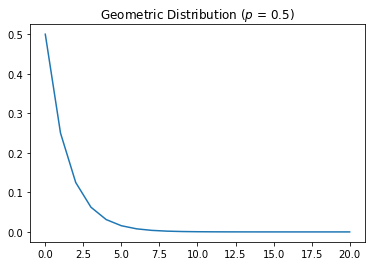

In [11]:
def geometric(k, p): # p is a parameter
    return p*(1-p)**k 

# CHANGE THIS TO SEE DIFFERENT POISSON DISTRIBUTIONS
p = 0.5
x = [i for i in range(20+1)]
y = [geometric(i, p) for i in x]
plt.plot(x, y)
plt.title(f"Geometric Distribution ($p$ = {p})")
plt.show()

### Normal Distribution

The normal, or Gaussian Distribution (also known as the bell curve), is one of the most commonly encountered probability distributions. This is because of the central limit theorem, which we'll discuss next. The normal distribution is also the limit of Poisson and Binomial distributions, as certain parameters go to zero or infinity. The nice analytical properties of the probability distribution function mean that most people approximate noise or measurement error as Gaussian.

$$P(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\left[(x-\mu)/\sigma\right]^2}$$

$$\begin{align*}
\text{Mean:} &\qquad \mu\\
\text{Variance:} &\qquad \sigma^2\\
\text{Median:} &\qquad \mu \\
\text{Support:} &\qquad \mathbb{R}
\end{align*}$$

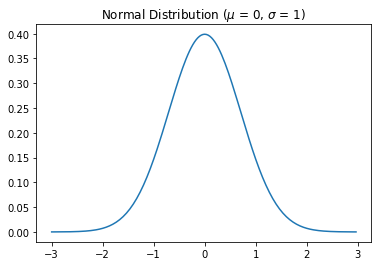

In [15]:
def normal(x, mu, sigma): # mu, sigma are parameters
    return (1/(2*np.pi*sigma**2)**0.5)*np.exp(-1*((x - mu) / sigma)**2)

# CHANGE THESE TO SEE DIFFERENT POISSON DISTRIBUTIONS
mu = 0
sigma = 1

x = np.arange(-3*sigma, 3*sigma, sigma / 30)
y = [normal(i, mu, sigma) for i in x]
plt.plot(x, y)
plt.title(f"Normal Distribution ($\mu$ = {mu}, $\sigma$ = {sigma})")
plt.show()

## Central Limit Theorem

Why is the normal distribution so common? The *central limit theorem* is one reason:

If $X_1, X_2, \dots, X_N$ are independent, identically distributed (IID) random variables, with mean $\mu$ and standard deviation $\sigma$, then in the limit as $N \to \infty$, the random variable 
$$Z = \frac{1}{N}\sum_{i=1}^{N}X_i$$
is normally distributed, with mean $\mu$ and standard deviation $\sigma / \sqrt{n}$

Note: the $X_i$ can have **any** distribution! You don't even have to know the distribution itself, just its mean and standard deviation. This means that randomly sampling from a population distribution allows us to estimate the mean of the population, with the accuracy of that estimate (i.e. the standard deviation) decreasing as the sample size increases.

# Statistics

> "There are three types of lies -- lies, damn lies, and statistics." -Benjamin Disraeli

If probability theory is how we model random systems, statistics is how we evaluate those model. Statistical tools tell us the extent to which our system matches the model; they let us estimate the parameters of a model from observations; and they let us predict the distribution of future samples from a model. Instead of throwing a list of statistical tools at you, I want to explore the concepts underlying these uses of statistical tools.

## The P-Value
> "When you run two experiments, one testing a clinical treatment that seems theoretically promising and the other testing whether dead salmon respond emotionally to romantic photos, and both experiments succeed with p-values of .03, you don't really want to treat the two hypotheses the same." -Jordan Ellenberg, *How Not to Be Wrong: The Power of Mathematical Thinking*

P-values are often misunderstood by even trained scientists. P-values are, in fact, a tool from probability theory; not statistics. But in statistics, we use this tool to make a statistical conclusion about a model for a system. 

Consider a population of people in a country $A$, with heights that are normally distributed about an unknown mean $M$, but with a known standard deviation $\sigma$. In neighboring country $B$, the heights are normally distributed with mean $\mu$ and standard deviation $\sigma$. Is this $\mu$ the value of the mean in country $A$?

First, we set out to collect a simple, random sample of $N$ members of the population in $A$. We can consider the height of each sampled person to be a random variable $X_i$, with distribution identical to the population distribution. The average of these sampled variables, $Z = \sum_iX_i/N$, is a random variable with mean $M$ and standard deviation $\sigma /\sqrt{N}$. When we conducted the random sample, we essentially sampled from $Z$; the sample mean $\mu_{sample}$ was drawn from the distribution of $Z$. And, if the mean of country $A$ was equal to that of country $B$, the probability of getting a value as large or larger than $\mu_{sample}$ would be $$P(x \geq \mu_{sample}) = 1 - \Phi\left(\frac{x-\mu}{\sigma/\sqrt{n}}\right) = \int_{\mu_{sample}}^{\infty}\frac{1}{\sqrt{2\pi\sigma^2/n}}e^{-((x-\mu)/(\sigma/\sqrt{n}))^2}dx$$

The function $\Phi$ is known as the *cumulative distribution function* for the normal distribution; it represents the probability of getting a value less than $x$, for a standard normal distribution with mean $0$ and variance $1$.

The p-value is the probability of getting a value as extreme or more extreme than the observed value, given our hypothesis that $M = \mu$. In statistical terminology, $M = \mu$ is the *null hypothesis*; we are comparing it to the alternative hypothesis $M > \mu$. 

How do we judge the validity of the null hypothesis? If this p-value is small, then the observed event is unlikely given that our model is true. We can conclude that the model must be wrong, and so we reject the null hypothesis and accept the alternative hypothesis. 

What if the p-value is large? Then the event that occured was highly likely, given our null hypothesis. This evidence doesn't *confirm* the null hypothesis; in fact, nothing can confirm a null hypothesis! We simply fail to reject it based on the observed evidence.

What is a small p-value? You may have seen reference to a significance level of $\alpha = 0.05$ before. For a statistical inference about a set of hypotheses to be valid, you must choose a significance level before conducting any sort of test. Researchers across many scientific communities have standardized upon $0.05$ as a reasonably small p-value; if you observe a value that should only occur one out of every twenty experiments, then your null hypothesis is likely to be wrong. $0.05$ is a somewhat arbitrary choice; many other significance levels are also used. What's important is to know what likeliness threshold is reasonable for the data you are collecting: for example, if we are running an experiment 20 times, we would expect at least one to be significant at the $\alpha=0.05$ level about $64\%$ of the time. 

Choosing a p-value to fit the observed data, or deliberately choosing too high a value for $\alpha$, is known as p-hacking. It's unethical, and leads to improper statistical conclusions. To avoid p-hacking, choose your significance level before you run any experiments (which is why a standard of $0.05$ is useful!), and make sure that you adjust that p-value to account for multiple experiments.

## Statistical Tests and Test Statistics
> "At school you were taught about chemicals in test tubes, equations to describe motion, and maybe something on photosynthesis—about which more later—but in all likelihood you were taught nothing about death, risk, statistics, and the science of what will kill or cure you." -Ben Goldacre, *Bad Science*

When testing a hypothesis, you must identify the statistical test to be used, perform the experiment, run the test, and form a conclusion based on the p-value. In high-school, I learned an acronym to remember the steps for hypothesis testing: PHANTOM

P: identify the **parameters** of interest for your test (e.g. population mean)

H: state your null and alternative **hypotheses**- make sure these cover every possibility!

A: identify the **assumptions** you are making about the population to be sampled

N: choose and **name** the statistical test to be performed (1-sided Z-test, 2-sided t-test, etc.)

T: calculate a **test** statistic, using data sampled from the population of interest

O: **obtain** a p-value using the cumulative distribution function of the distribution of the test statistic

M: **make a decision** about whether or not to reject your null hypothesis

This procedure is designed for scoring points on the AP Statistics exam. You won't always explicitly state the null and alternative hypotheses in a research paper. In fact, the entire hypothesis testing procedure might be written in a single sentence! As long as the important details- the parameter of interest, the significance level, the statistical test, the value of the test statistic, and the p-value- are included in your work, your audience will understand your statistical analysis.

What exactly are statistical tests, and how are they related to test statistics? *Statistical tests* are a systematic way of relating hypotheses to p-values, by linking specific hypothesis (under specific assumptions about the sample and parameter) to methods for calculating a *test statistic*. This test statistic, under those assumptions, has a fixed probability distribution, and we can easily look up or calculate the p-value for the calculated test statistic.

In our example above, we performed a *one-sided Z-test*. The one-sided Z-test:

>links the hypotheses "The mean of the population is $\mu$" and "The mean of the population is greater than $\mu$"; 

>under the assumption that we calculated a mean $M$ from a simple random sample of size $N$ of a population with variance $\sigma^2$;

>to the $Z$-score $(x - \mu) / (\sigma/\sqrt{N})$. 

From the central limit theorem this $Z$-score has a standard normal distribution, and so we can compute our p-value easily. 

Choosing a statistical test can be difficult, but the task is made easier by identifying the population parameter of interest and the hypotheses you wish to test about that parameter. Once we have a parameter and hypotheses, the assumptions we can make about our sample typically inform our choice of test. For example, if instead of having a known standard deviation $\sigma$, the distribution of heights in country $A$ has an unknown standard deviation, we would use a *t-test*, with a test statistic that follows *Student's t-distribution*.

If for some reason you don't want to calculate a p-value, but you wish to perform a hypothesis test, you can use a table listing *critical values* for the test statistic at a series of significance levels. If your test statistic lies beyond the critical value at your significance level, its p-value is smaller than the significance level.

## Confidence Intervals
> "The problem with the world is that the intelligent people are full of doubts, while the stupid ones are full of confidence." -Charles Bukowski

*Confidence intervals*, like p-values, are a tool from probability used to make statistical conclusions. Consider, again, the sample of heights from the population of country $A$. Given our sample mean $\mu_{sample}$, what can we say about the likely value of the true population mean? Our sample mean is, by the central limit theorem, a sample from a normal distribution with mean $M$ and standard deviation $\sigma/\sqrt{N}$. If we repeated this "sampling of the sample mean" many times, we would get many different samples from this same normal distribution. For each sample, we can construct  a $(1-\alpha)\times 100 \%$-confidence interval; the fraction of these intervals that contain the population mean $M$ is $1-\alpha$, in the limit as the number of samples goes to infinity. 

Note: a confidence interval does **not** represent a probability that the population parameter is within some range of the estimate! The parameter is unknown, but guaranteed to be either inside or outside that range. The confidence level represents the *fraction* of confidence intervals that contain the population parameter, after sampling many times from the distribution of interest.

How do we construct an $(1-\alpha)\times 100\%$-confidence interval? For a cumulative distribution function $\Phi$ of the distribution of the test statistic, we find the critical value $z^* = \Phi^{-1}\left(1-\alpha/2\right)$. If our parameter estimate is $\bar{x}$, and the standard deviation of the distribution of that estimate (also known as the *standard error*) is $SE$, the $(1-\alpha)\times 100\%$-confidence interval is:

$$\left(\bar{x} - z^*\cdot SE, \bar{x} + z^* \cdot SE\right)$$



## Linear Regression
> "History fancies itself linear - but yields to a cyclical temptation." Criss Jami, *Healology*

Consider a sample of two variables, $X$ and $Y$, drawn from a population. How can we characterize the relationship between these variables, given the observed samples? *Linear regression* gives us a powerful set of tools for characterizing simple relationships, by finding the line that best fits the data. Linear regression finds the values $m$ and $b$ that minimize the squared error of approximating the relationship between $X$ and $Y$ as linear:
$$\text{Error }(m, b) = \sum_i\left[y_i-\left(mx_i+b\right)\right]^2$$
To minimize this error, we take its derivatives with respect to $b$ and $m$, and set them equal to zero:
$$\begin{align*}
\frac{dE}{db} = -2\sum_i(\left[y_i-\left(mx_i+b\right)\right] = 0 &\to b = \bar{y} - m\bar{x} \\
\frac{dE}{dm} = -2\sum_i(x_i-\bar{x})\left[y_i-\left(mx_i+b\right)\right] = -2\sum_i(x_i-\bar{x})\left[y_i-\left(mx_i+\bar{y} - m\bar{x}\right)\right] &\to m = \frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i(x_i-\bar{x})^2}
\end{align*}$$
Note that $\bar{x}$ is the average of the $X$ samples.
How strong is this relationship? The *sample correlation coefficient* can tell us. If we let $s_x$ and $s_y$ represent the standard deviations of the $N$ samples, then the correlation coefficient $r$ is:

$$r = \frac{1}{N-1}\sum_i\left[\frac{x_i-\bar{x}}{s_x}\cdot\frac{y_i-\bar{y}}{s_y}\right]$$

Of course, there are statistical tests for the accuracy of all of these quantities. 

I want to emphasize a few points about linear regression. 

First, the equation $y=mx+b$ only explains the data within the range of $X$ values sampled. If a value lies outside that range, there are no guarantees that the regression will give a valid prediction of the $Y$-value. 

Second, you can get a better regression fit by removing outliers from your data. An outlier can be a value with too extreme an $X$-value, too extreme a $Y$-value, or both. In general, it is a good idea to inspect your data visually (i.e. with a histogram, a box-and-whiskers plot, or a scatterplot) before performing a regression or any other statistical procedure.

Third, not all relationships are linear. But many relationships are linear for small variations in the independent variable. Think of this as a statistical analogue to a taylor series expansion: If $Y = f(X)$, then we can expand $f$ in a taylor series about $\mu_X$, and truncate after the linear terms: $$Y \approx f(\mu_X) + (X - \mu_X)f'(\mu_X)$$


